In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
#Import CSV file
data = pd.read_csv("youtube_channels_1M_clean.csv")

In [4]:
#Total number of rows in the dataset
len(data)

1095242

In [5]:
data.head()

,channel_id,channel_link,channel_name,subscriber_count,banner_link,description,keywords,avatar,country,total_views,total_videos,join_date,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week
0,UCUMHFa347GD8EIRaVVuxR8Q,/@TonettaClay,Tonetta Clay,781,https://yt3.googleusercontent.com/bj2C0MOj3SMi...,My name is Tonetta or Toni for short and I'm d...,NaN,https://yt3.googleusercontent.com/cUmKB4Zet1SX...,NaN,227567.0,1984.0,2015-12-08,10.866667,6.5,13.922963,1.50
1,UC28mqg7IlYWEhrZwHb72IQA,/@FoodnHappinessVeena,Food 'n' Happiness,0,NaN,"Hello viewers.\n I am Veena from Mangalore, Ka...","food n happiness, food and happiness, food, Fo...",https://yt3.googleusercontent.com/lY_u-8bLWNgA...,India,592961.0,158.0,2020-05-08,1448.066667,1510.0,869.364401,0.00
2,UCoLwWY9zQ7Jp8aDtYUszmYg,/@TimShieff,Tim Shieff,166000,https://yt3.googleusercontent.com/2KC8Lj8RF3uF...,The journey of rediscovery.\n\nhttps://rdscvr.com,"Tim, shieff, timothy, health, human, spiritual...",https://yt3.googleusercontent.com/-aNZLP23AnkX...,United Kingdom,27250763.0,372.0,2006-03-19,5456.933333,3430.0,4322.803149,0.00
3,UCAQOeJwsgBMC74-OjjcQcJA,/@JerryAndJulieMusic,Jerry & Julie Music,1090,https://yt3.googleusercontent.com/dI6Oq0iOhx-c...,Welcome to Jerry & Julie Music. We hope you w...,"jerryandjuliemusic, jerryspianobar, juliesguit...",https://yt3.googleusercontent.com/c41pe3_aA75h...,United States,339906.0,913.0,2010-03-27,75.966667,47.5,113.374448,4.00
4,UCOqwGhI1AmpWwxMYw9D_fqw,/@KichuandYugiMagizhakam,Kichu and Yugi Magizhakam,1160,https://yt3.googleusercontent.com/CXrATV8NKPRg...,Hi friends welcome to my channel...I'm Devi mo...,NaN,https://yt3.googleusercontent.com/FDA5pc1ZQ5jT...,NaN,288328.0,476.0,2023-12-21,85.700000,66.0,72.032007,1.25


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095242 entries, 0 to 1095241
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   channel_id                   1095242 non-null  object 
 1   channel_link                 1095242 non-null  object 
 2   channel_name                 1095182 non-null  object 
 3   subscriber_count             1095242 non-null  int64  
 4   banner_link                  766877 non-null   object 
 5   description                  819743 non-null   object 
 6   keywords                     547204 non-null   object 
 7   avatar                       1095242 non-null  object 
 8   country                      620059 non-null   object 
 9   total_views                  1094490 non-null  float64
 10  total_videos                 1094985 non-null  float64
 11  join_date                    1095220 non-null  object 
 12  mean_views_last_30_videos    1059085 non-n

In [36]:
# Dropping columns which are not required for the analysis
#errors = 'ignore' ignores the errors if columns are not present in the dataset
data = data.drop(['banner_link','description','avatar'], axis=1, errors='ignore')

In [37]:
#Dropping null values for the selected columns
filtered_data = data.dropna(subset = ['country','channel_name','total_views','subscriber_count','total_videos','join_date'])
len(filtered_data)

619721

In [ ]:
#changing the datatype to datetime format
filtered_data['join_date'] = pd.to_datetime(filtered_data['join_date'])

In [ ]:
#Fetching year from the join date column
filtered_data['start_year'] = filtered_data['join_date'].dt.year

In [43]:
filtered_data.head()

,channel_id,channel_link,channel_name,subscriber_count,keywords,country,total_views,total_videos,join_date,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week,start_year
1,UC28mqg7IlYWEhrZwHb72IQA,/@FoodnHappinessVeena,Food 'n' Happiness,0,"food n happiness, food and happiness, food, Fo...",India,592961.0,158.0,2020-05-08,1448.066667,1510.0,869.364401,0.0,2020
2,UCoLwWY9zQ7Jp8aDtYUszmYg,/@TimShieff,Tim Shieff,166000,"Tim, shieff, timothy, health, human, spiritual...",United Kingdom,27250763.0,372.0,2006-03-19,5456.933333,3430.0,4322.803149,0.0,2006
3,UCAQOeJwsgBMC74-OjjcQcJA,/@JerryAndJulieMusic,Jerry & Julie Music,1090,"jerryandjuliemusic, jerryspianobar, juliesguit...",United States,339906.0,913.0,2010-03-27,75.966667,47.5,113.374448,4.0,2010
5,UCkcc9W34khoJeQA6Eypp0JA,/@burhanzohan2341,Burhan & Zohan,617,"Burhan & Zohan, cooking and vlogging, lifestyl...",Pakistan,36995.0,36.0,2021-10-26,1007.433333,62.0,3885.400320,0.0,2021
8,UC5O702QlZNC1f3VD8bn1hCg,/@healhub-,Heal Hub,0,"Health, Heal Hub, Good Health",United States,30.0,6.0,2024-02-01,NaN,NaN,NaN,NaN,2024


In [22]:
#Finding the number of countries in the dataset
countries = filtered_data['country'].unique().tolist()
len(countries)

229

In [45]:
filtered_data.describe()

,subscriber_count,total_views,total_videos,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week,start_year
count,6.197210e+05,6.197210e+05,6.197210e+05,6.074780e+05,6.074780e+05,6.074780e+05,607478.000000,619721.000000
mean,1.034619e+05,3.925327e+07,5.670574e+02,4.440492e+04,2.020371e+04,7.097513e+04,0.852521,2016.833010
std,1.069276e+06,6.585487e+08,4.637105e+03,1.207636e+06,5.849151e+05,1.854131e+06,1.753703,4.454044
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2005.000000
25%,1.650000e+02,3.097400e+04,4.900000e+01,1.241667e+02,5.300000e+01,1.324409e+02,0.000000,2014.000000
50%,1.140000e+03,2.039550e+05,1.420000e+02,6.180833e+02,1.995000e+02,8.546111e+02,0.000000,2018.000000
75%,7.980000e+03,1.644852e+06,3.890000e+02,3.637092e+03,1.135500e+03,5.894358e+03,0.750000,2020.000000
max,2.440000e+08,1.788442e+11,1.248360e+06,6.889384e+08,1.783875e+08,1.069565e+09,7.500000,2024.000000


In [52]:
#Grouping data based on country
grouped_filtered_data = filtered_data.groupby('country')['channel_id'].count().reset_index()
grouped_filtered_data

,country,channel_id
0,Afghanistan,85
1,Albania,27
2,Algeria,388
3,American Samoa,32
4,Andorra,11
...,...,...
224,Wallis & Futuna,2
225,Yemen,17
226,Zambia,19
227,Zimbabwe,144


In [54]:
#Finding the top 5 countries, that has max number of channels
top_5_countries = grouped_filtered_data.sort_values(by='channel_id',ascending=False).head(5)
top_5_countries

,country,channel_id
217,United States,239797
92,India,117643
216,United Kingdom,44092
37,Canada,26306
152,Pakistan,19949


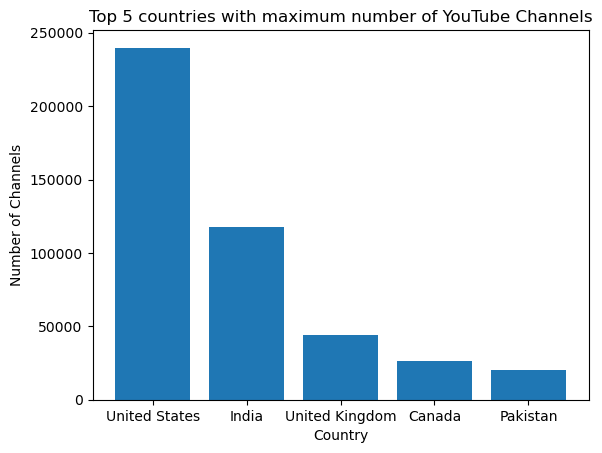

In [57]:
#Plotting bar chart to see the countries that has more channels joined
plt.bar(top_5_countries['country'], top_5_countries['channel_id'])
plt.xlabel('Country')
plt.ylabel('Number of Channels')
plt.title('Top 5 countries with maximum number of YouTube Channels')
plt.show()

In [58]:
#Grouping data based on joining year of the Youtube channel
grouped_data_for_joinDate = filtered_data.groupby('start_year')['channel_id'].count().reset_index()
grouped_data_for_joinDate

,start_year,channel_id
0,2005,363
1,2006,10480
2,2007,10489
3,2008,10080
4,2009,13534
5,2010,15784
6,2011,30438
7,2012,28978
8,2013,33339
9,2014,33232


In [62]:
grouped_data_for_joinDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_year  20 non-null     int64
 1   channel_id  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [59]:
#Finding the years that has got more YT channels (top 5)
top_5_joinDate = grouped_data_for_joinDate.sort_values(by='channel_id',ascending=False).head(5)
top_5_joinDate

,start_year,channel_id
15,2020,83189
16,2021,57259
17,2022,47380
14,2019,46284
12,2017,41236


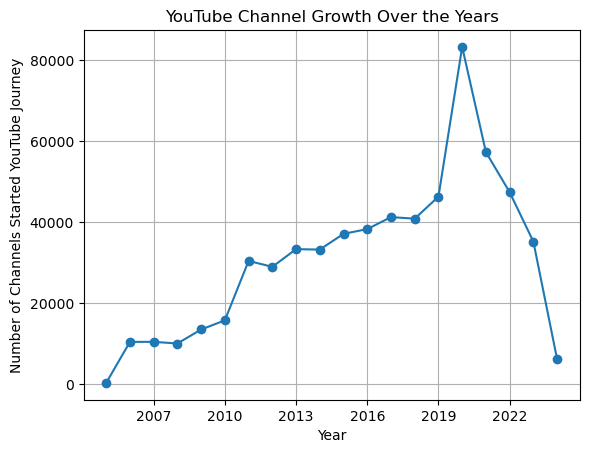

In [65]:
#Showing the trend of YT channel's joining journey over time
plt.plot(grouped_data_for_joinDate['start_year'], grouped_data_for_joinDate['channel_id'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Channels Started YouTube Journey')
plt.title('YouTube Channel Growth Over the Years')
# Set x-axis ticks to be integers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.show()

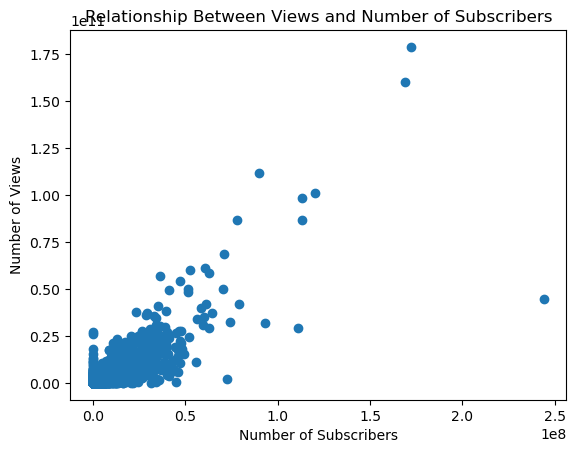

In [71]:
#Checking the relation between number of views and number of videos

#Plot a scatter plot
plt.scatter(filtered_data['subscriber_count'], filtered_data['total_views'])
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Views')
plt.title('Relationship Between Views and Number of Subscribers')
plt.show()

In [69]:
#Finding the hinghest number of subscribers
max_subscribers = filtered_data['subscriber_count'].max()
max_subscribers

244000000

In [70]:
#Fetching the details of channel, which has max subscribers
channel_details_max_sub = filtered_data[filtered_data['subscriber_count'] == max_subscribers]
channel_details_max_sub

,channel_id,channel_link,channel_name,subscriber_count,keywords,country,total_views,total_videos,join_date,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week,start_year
1086644,UCX6OQ3DkcsbYNE6H8uQQuVA,/@MrBeast,MrBeast,244000000,"mrbeast6000, beast, mrbeast, Mr.Beast, mr",United States,4.457287e+10,780.0,2012-02-20,1.971791e+08,178387547.0,6.014584e+07,0.25,2012


In [72]:
#Finding highest number of views
max_views = filtered_data['total_views'].max()
max_views

178844248668.0

In [73]:
#Fetching the details of channel, which has max views
channel_details_max_views = filtered_data[filtered_data['total_views'] == max_views]
channel_details_max_views

,channel_id,channel_link,channel_name,subscriber_count,keywords,country,total_views,total_videos,join_date,mean_views_last_30_videos,median_views_last_30_videos,std_views_last_30_videos,videos_per_week,start_year
1015791,UCbCmjCuTUZos6Inko4u57UQ,/channel/UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery Rhymes,172000000,"nursery rhymes, baby songs, nursery songs, kid...",United States,1.788442e+11,1103.0,2006-09-01,7.234832e+06,5990773.5,6.603092e+06,2.0,2006
